In [19]:

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        os.path.join(dirname, filename)



# Importing libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 
import matplotlib.pyplot as plt # for plot the graph 
import seaborn as sns
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.model_selection import train_test_split # to split the data into two parts

# Reading The Dataset

In [3]:
df = pd.read_csv('./input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info() # missing value and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe (include = 'O')

,diagnosis
count,569
unique,2
top,B
freq,357


# Cleaning

In [6]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)

# Encoding

In [7]:
df.diagnosis.unique() 

array(['M', 'B'], dtype=object)

In [8]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])

# EDA

<Axes: >

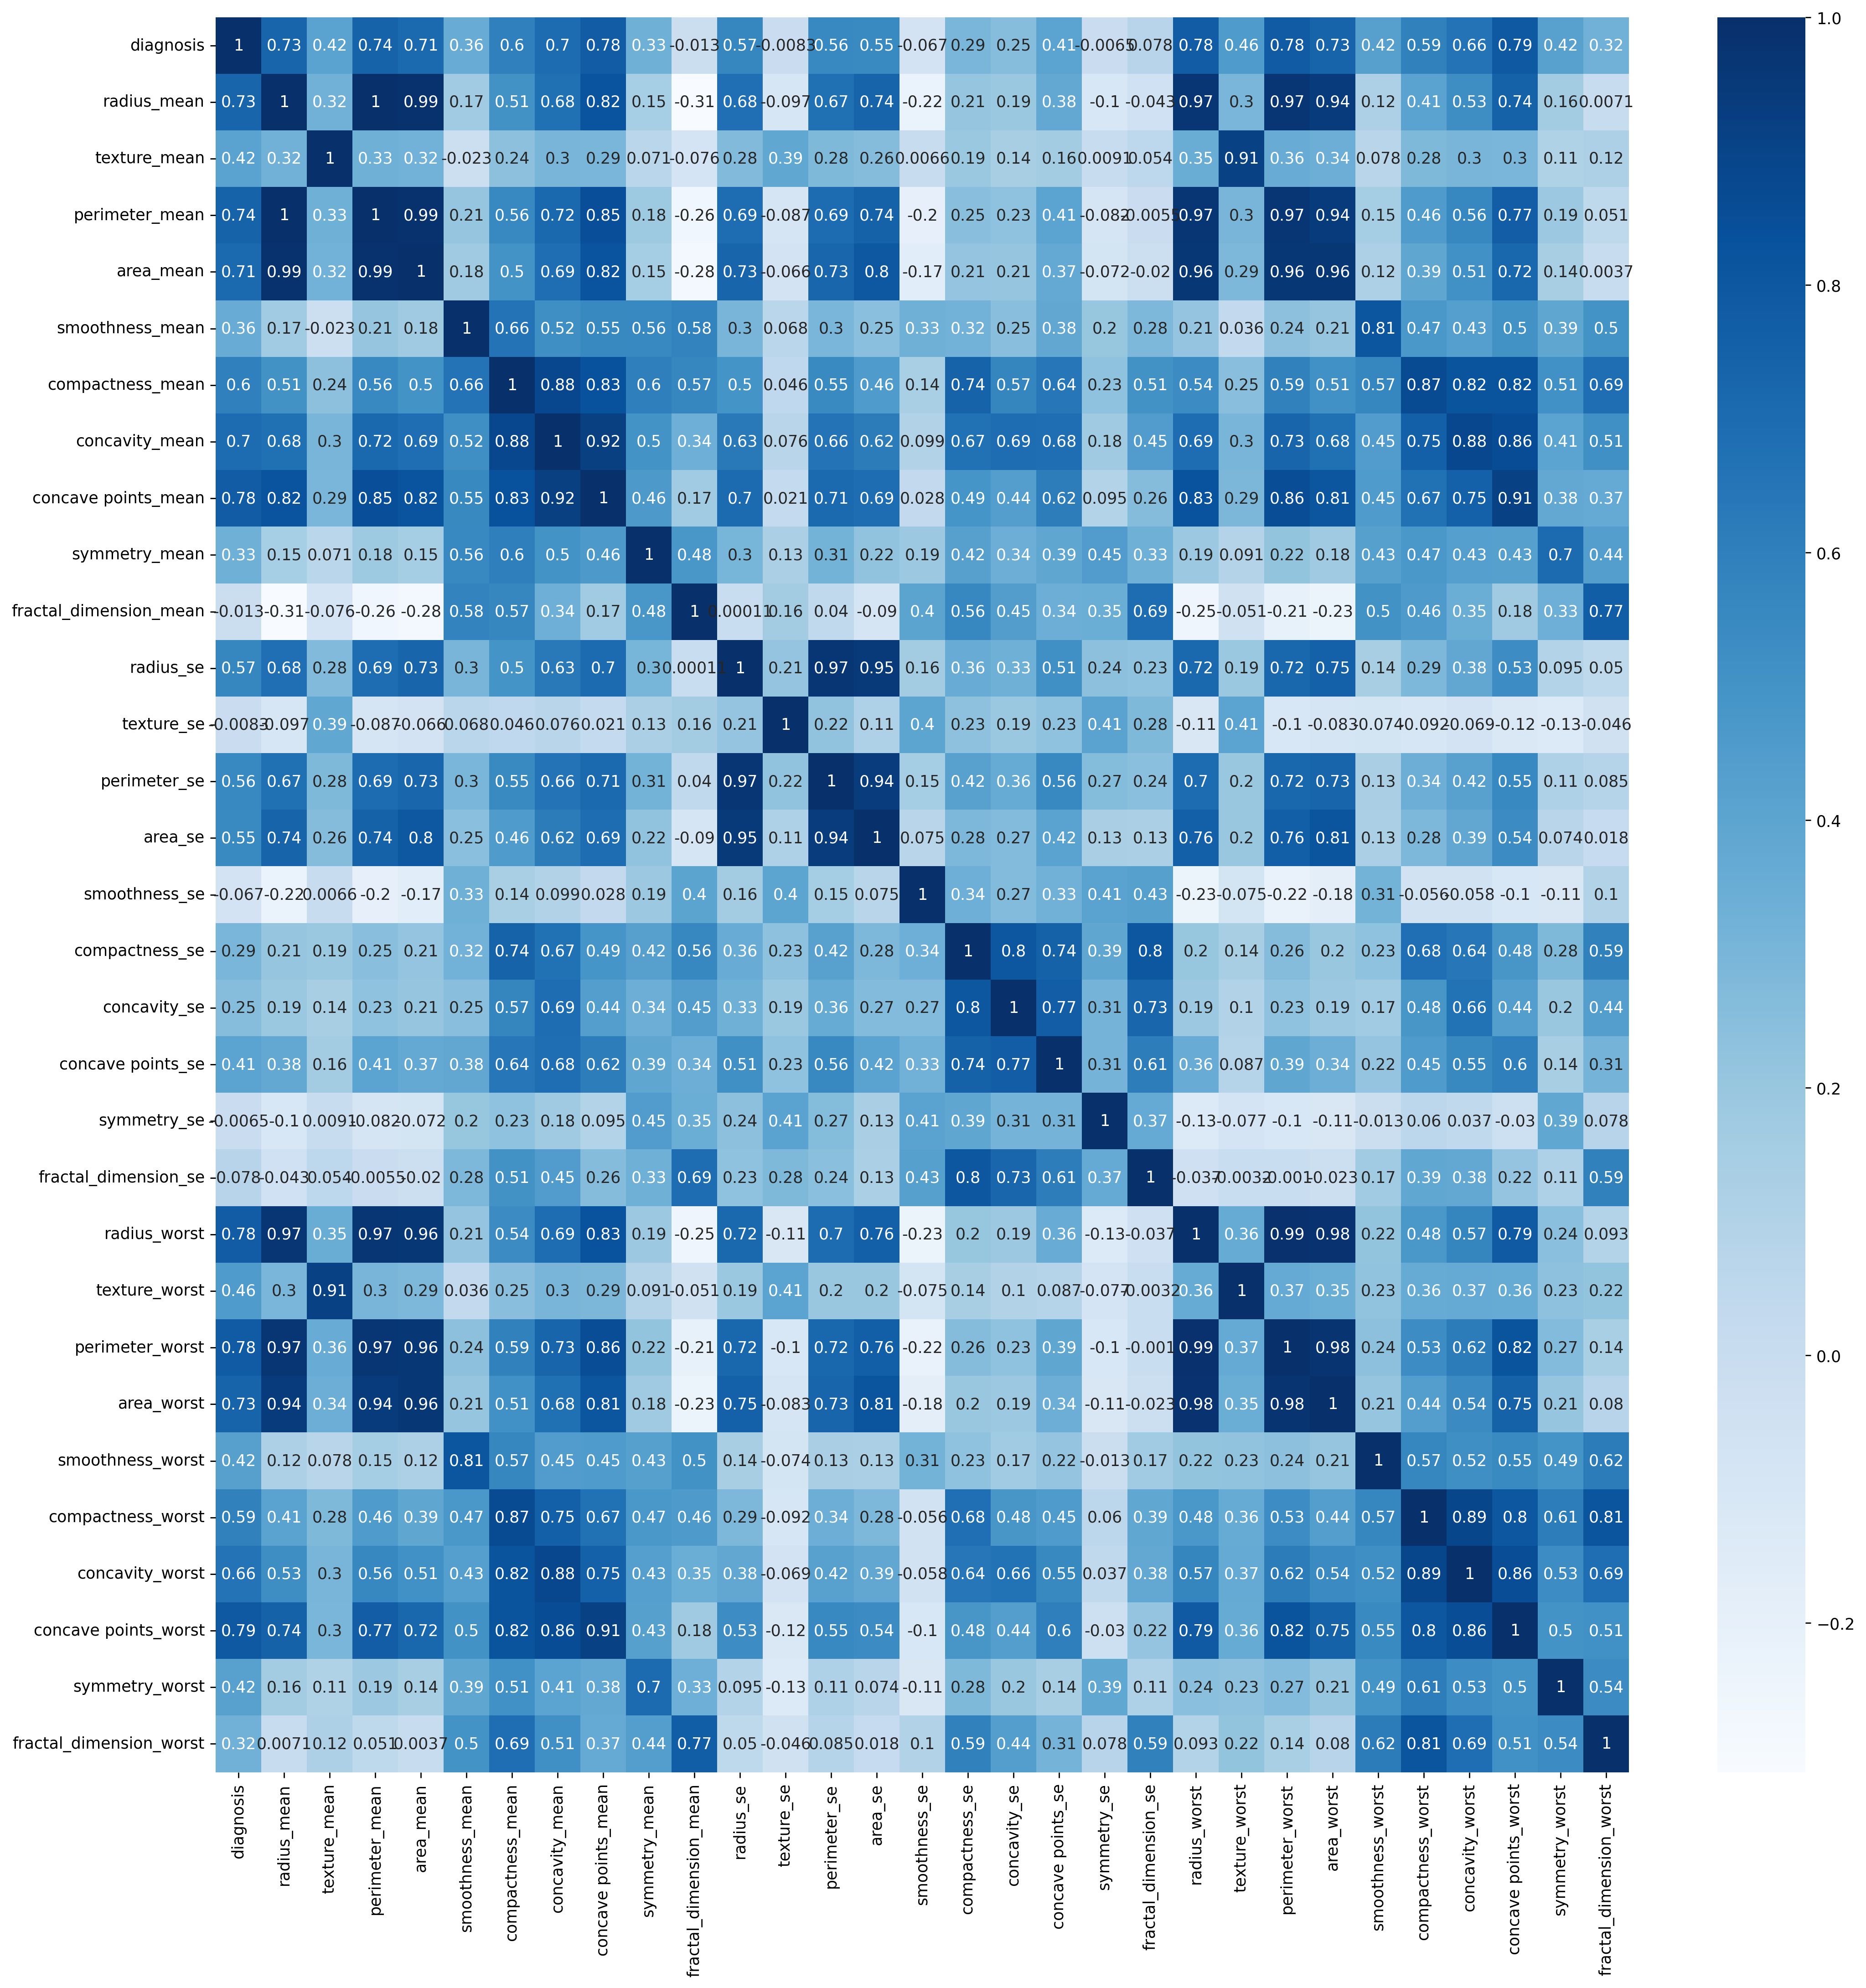

In [10]:
fig = plt.figure(figsize=(20,20), dpi=250)
sns.heatmap(df.corr(), cmap="Blues", annot=True)

<Axes: >

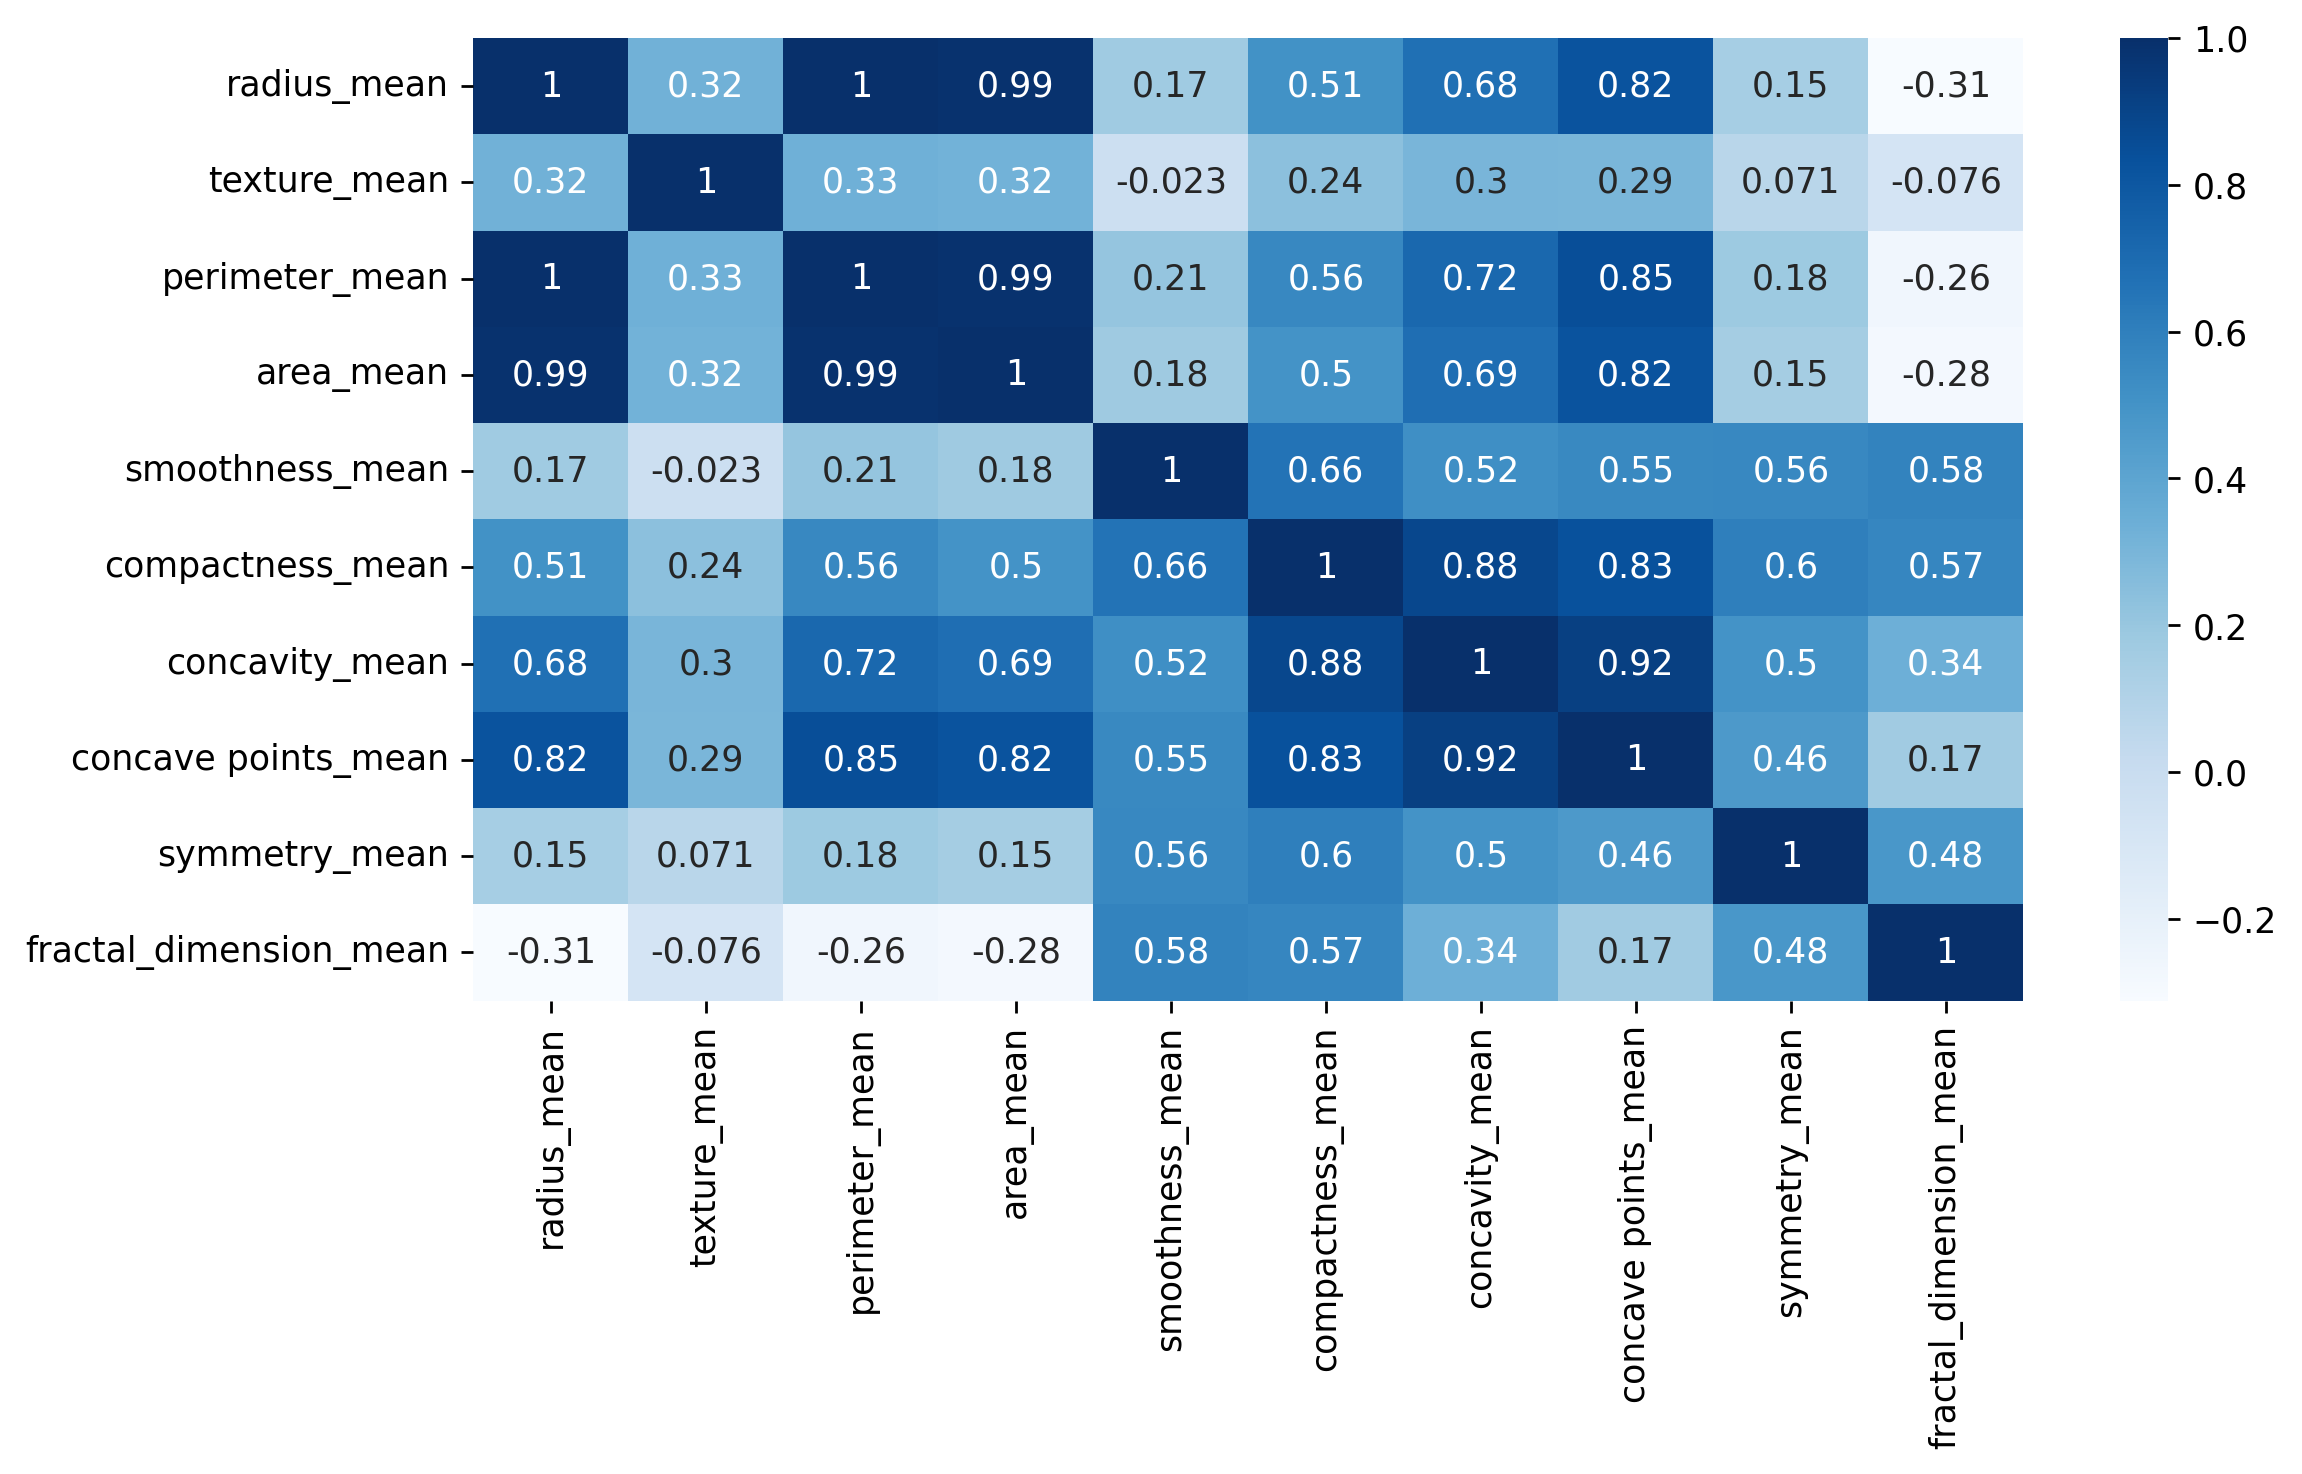

In [11]:
fig = plt.figure(figsize=(10,5), dpi=250)
sns.heatmap(df[features_mean].corr(), cmap="Blues", annot=True)

<Axes: >

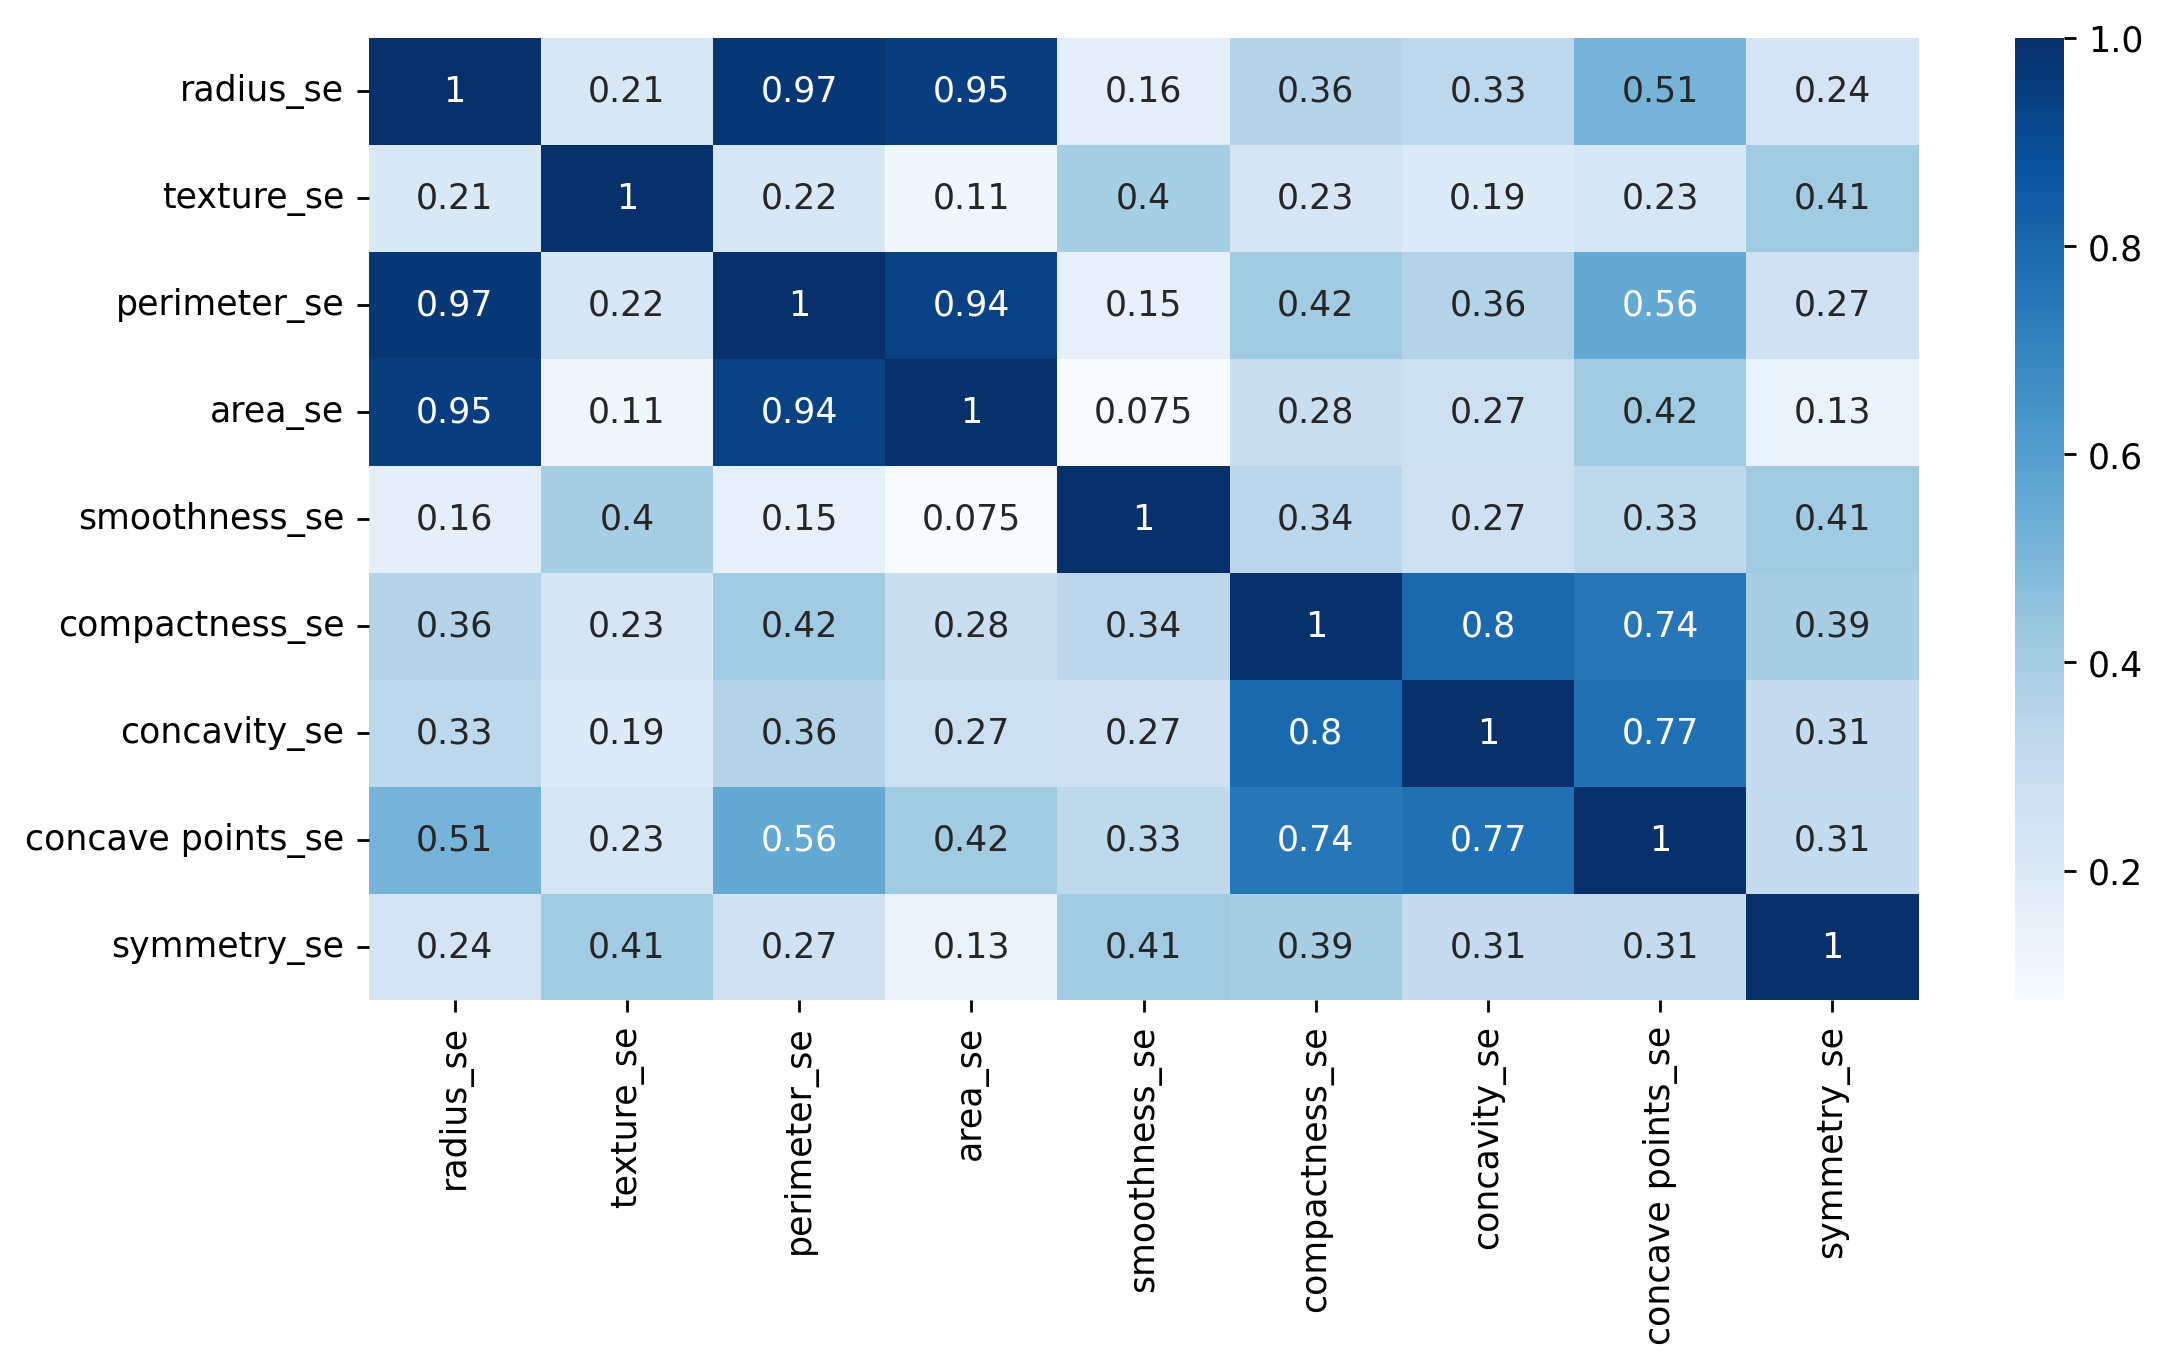

In [12]:
fig = plt.figure(figsize=(10,5), dpi=250)
sns.heatmap(df[features_se].corr(), cmap="Blues", annot=True)

<Axes: >

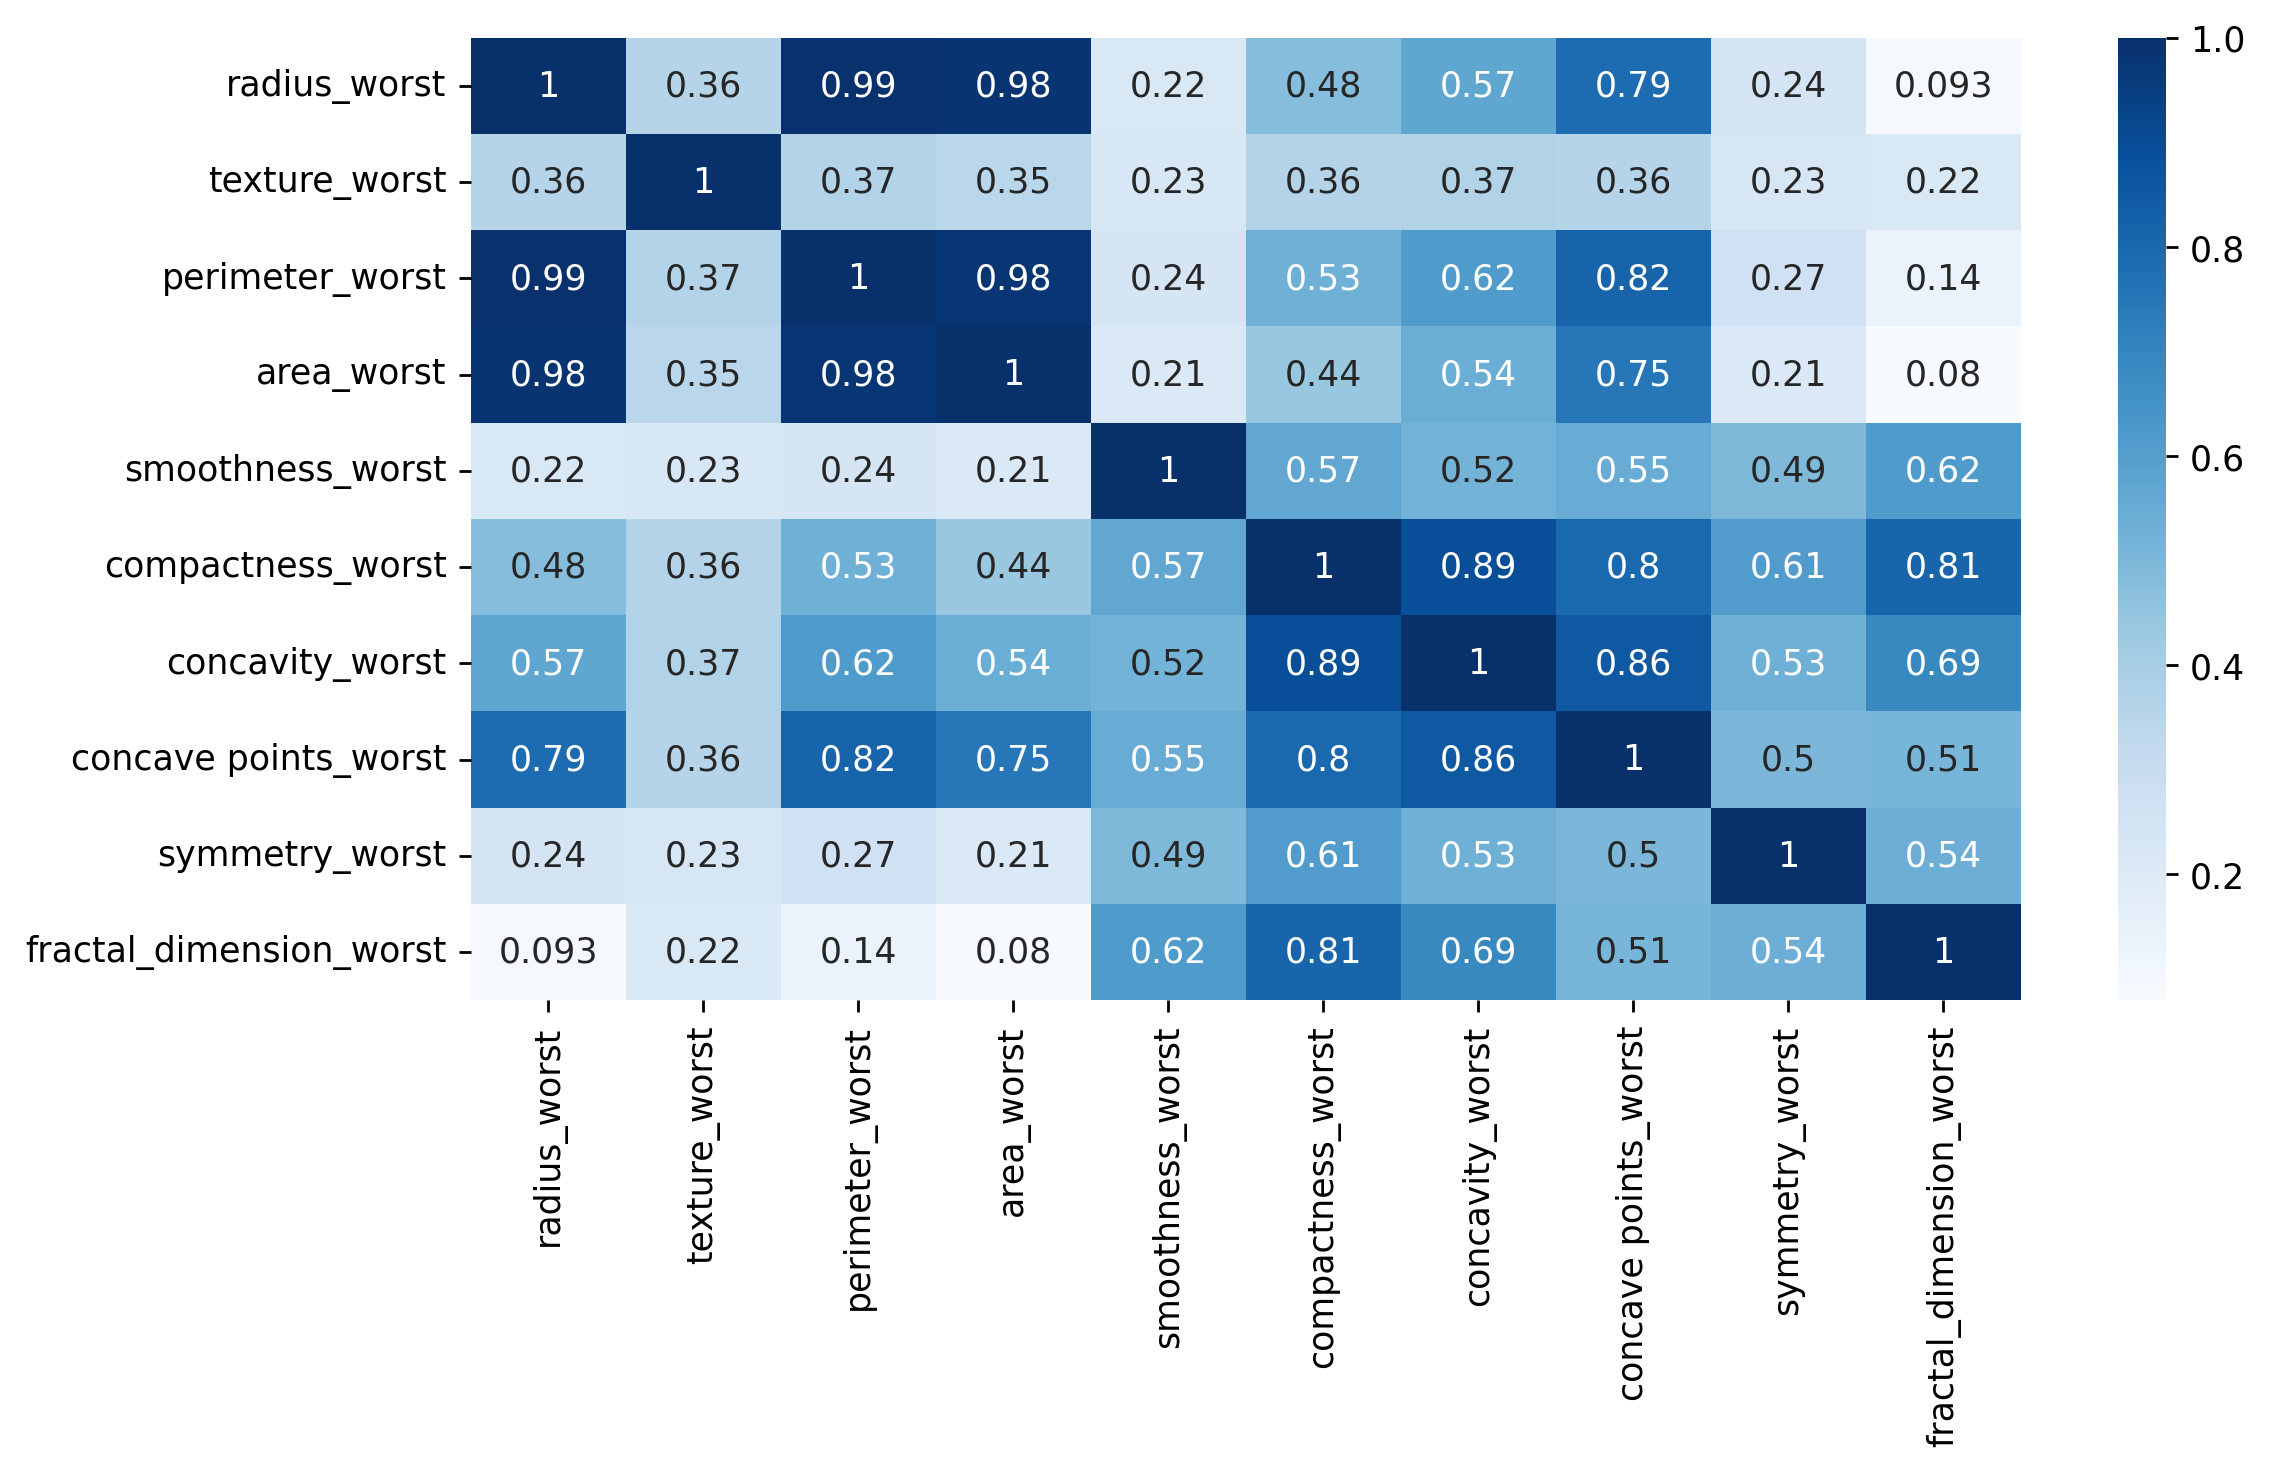

In [13]:
fig = plt.figure(figsize=(10,5), dpi=250)
sns.heatmap(df[features_worst].corr(), cmap="Blues", annot=True)

# Preparing the data

In [14]:
# Spliting the data into Train and Test
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
 

In [16]:
# Initialize XGBoost classifier
model = XGBClassifier()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [17]:
# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [18]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred ) 
recall = recall_score(y_test, y_pred )  

print(f"Accuracy: {acc * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

Accuracy: 95.61%
Precision: 95.24%
Recall: 93.02%
